<a href="https://colab.research.google.com/github/IlyaS-26/Telecom/blob/main/lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа №8
Сергеев Илья, группа 3530901/90101

In [ ]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/archer-man/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal


from thinkdsp import decorate

Упражнение 8.1

Прогнаны примеры из блокнота chap08.ipynb. В интерактивном виджете есои при увеличении ширины гауссового окна std не увеличивать число элементов в окне M, то на графике возникают лепестки.

Упражнение 8.2

В главе утверждается, что преобразование Фурье гауссовой кривой - тоже гауссова кривая. Опробуем это соотношение на нескольких примерах. Начнем с кривой Гауса:

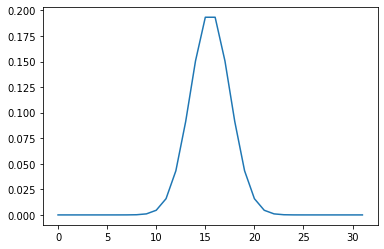

In [3]:
g = scipy.signal.gaussian(M=32, std=2)
g /= sum(g)
plt.plot(g)

Быстрое преобразование Фурье для гауссовой кривой:

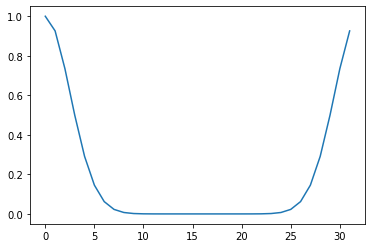

In [4]:
fft_g = np.fft.fft(g)
plt.plot(abs(fft_g))

Произведем свертку отрицательных частов влево. Результат приблизительно похож на гауссову кривую.

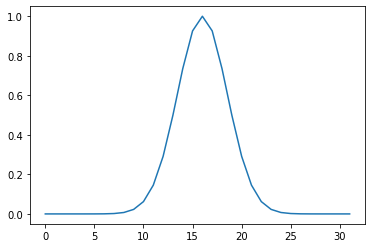

In [5]:
N = len(g)
fft_rolled = np.roll(fft_g, N//2)
plt.plot(abs(fft_rolled))

Это функция была взята из chap08sol, она строит гауссово окно и БПФ рядом.

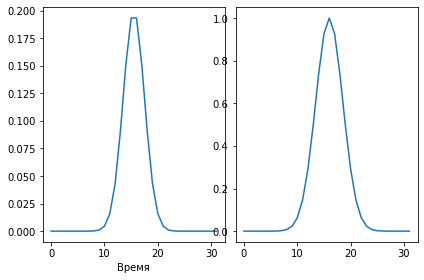

In [6]:
def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(g)
    
    plt.subplot(1, 2, 1)
    plt.plot(g)
    decorate(xlabel='Время')

    fft_g = np.fft.fft(g)
    fft_rolled = np.roll(fft_g, M//2)
    
    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    plt.show()

plot_gaussian(2)

In [7]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider);

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

С увеличением std, гауссова кривая становится шире, а БПФ - уже.

Упражнение 8.3

По примерам из главы, создадим 1-секундную волну с частотой дискретизации 44,1 кГц.

In [8]:
from thinkdsp import SquareSignal

sig = SquareSignal(freq=440)
wave = sig.make_wave(duration=1.0, framerate=44100)

Создадим несколько окон. Выбираем стандартное отклонение окна Гаусса, чтобы сделать его похожим на другие.

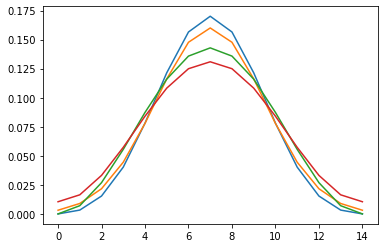

In [9]:
M = 15
std = 2.5

gaussian = scipy.signal.gaussian(M=M, std=std)   
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [blackman, gaussian, hanning, hamming]
names = ['blackman', 'gaussian', 'hanning', 'hamming']

for window in windows:
    window /= sum(window)

for window, name in zip(windows, names):
    plt.plot(window, label=name)

Графики выглядят очень похоже. Построим графики дискретного преобразования Фурье.

In [10]:
def zero_pad(array, n):

    res = np.zeros(n)
    res[:len(array)] = array
    return res

In [11]:
def plot_window_dfts(windows, names):

    for window, name in zip(windows, names):
        padded =  zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)

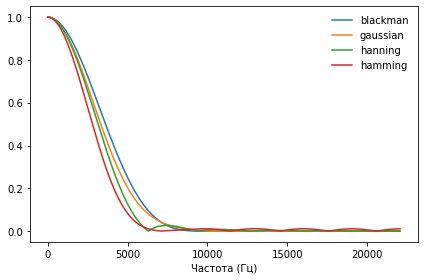

In [12]:
plot_window_dfts(windows, names)
decorate(xlabel='Частота (Гц)')

Хэмминг падает быстрее всего, Блэкман — медленнее, а Хэннинг имеет самые заметные боковые лепестки.

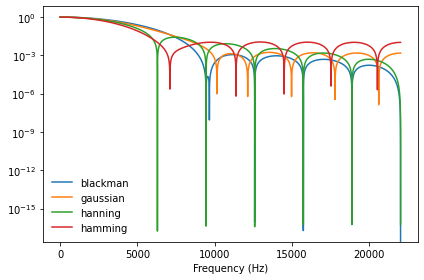

In [13]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)', yscale='log')

На логарифмической шкале мы видим, что показатели Хэмминга и Ханнинга поначалу снижаются быстрее, чем у двух других. И окна Хэмминга и Гаусса, кажется, имеют самые стойкие боковые лепестки. Окно Ханнинга может иметь наилучшее сочетание быстрого спада и минимальных боковых лепестков.